## 1. Data Exploration and Analysis

In [ ]:
# Loading packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import re

Loading pricing transparency datasets from Stony Brook University Hospital and New York Presbyterian Hospital into a Pandas DataFrame

In [ ]:
dfnyp = pd.read_json('https://raw.githubusercontent.com/zf81/sqlite_database_operations/main/datasets/nyp.json')
dfnyp

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [ ]:
# Checking size and shape
dfnyp.shape

(6193, 47)

In [ ]:
df_stonybrook = pd.read_csv('https://raw.githubusercontent.com/zf81/sqlite_database_operations/main/datasets/stonybrook.csv')
df_stonybrook

,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,30981203,R&B SICU 09W1 ICR PT-Z,NaN,NaN,12090.00,12090.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7706,30993018,R&B TICR 09W2 - PT-I,NaN,NaN,13590.00,13590.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7707,33500000,R&B REV PICU 11S2 PT-X,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7708,30333058,ROPH HOSP.OBSERVATION PT-T,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking size and shape
df_stonybrook.shape

(7710, 57)

Checking for missing values

In [ ]:
# Checking for missing values in NYP
missing_values = dfnyp.isnull().sum()
missing_values

Code (CPT/DRG)                          0
Description                             0
Rev Code                                0
Inpatient/Outpatient                    0
Gross Charges                           0
Discounted Cash Price                   0
Aetna                                   0
Cigna                                   0
Empire Blue Cross Blue Shield           0
Emblem Health                           0
United Health Group                     0
Aetna Medicare                          0
AgeWell Medicare                        0
Emblem Medicare                         0
Empire Medicare                         0
Fidelis Medicare                        0
Healthfirst Medicare                    0
UHC Community Plan/United Medicare      0
VNS Medicare                            0
WellCare Medicare                       0
1199                                    0
Affinity Molina Essential               0
Affinity Molina Medicaid/CHP            0
Amida Care Medicaid               

In [ ]:
# Drop missing values in NYP
df_nyp = dfnyp.dropna()
df_nyp

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


Cleaning Column Names

In [ ]:
# NYP
# Remove leading and trailing white space from a column
df_nyp.columns = df_nyp.columns.str.strip()

# Function to remove white space and special characters from a value
def clean_column_names(df):
    # Define a helper function to clean column names
    def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '_', name)
        return cleaned_name.lower()

    # Rename columns using the helper function
    # This is using a list comprehend - e.g., we have a list to the right of the equals sign,
    # and inside the list, we are applying our function, for every col (or X) that exists in df.columns
    df_nyp.columns = [clean_name(col) for col in df_nyp.columns]
    return df_nyp

# Apply the clean_value function to all columns
df_nyp = clean_column_names(df_nyp)


In [ ]:
# Preview NYP dataset
df_nyp.sample(10)

,code__cpt_drg_,description,rev_code,inpatient_outpatient,gross_charges,discounted_cash_price,aetna,cigna,empire_blue_cross_blue_shield,emblem_health,...,consumer_health_network,devon,equian,first_health,magnacare,multiplan_beechstreet_phcs,qhm,worldwide,minimum_negotiated_charge,maximum_negotiated_charge
3727,17004,HC DESTROY PREMAL LESIONS 15/>,0510,Inpatient/Outpatient,1402.0,1402.0,Not separately payable,Not separately payable,981.4,Not separately payable,...,637.0688,637.0688,637.0688,637.0688,637.0688,637.0688,637.0688,637.0688,398.130722,995.326806
2198,33233,REMOVAL OF PM GENERATOR,0360,Inpatient/Outpatient,25705.0,25705.0,9144,7496,15594,9474.4,...,11680.352,11680.352,11680.352,11680.352,11680.352,11680.352,11680.352,11680.352,2107.000000,15594.000000
4883,72156,HC MRI CERVICAL SPINE W/O & WITH CONTRAST,0612,Inpatient/Outpatient,6768.0,6768.0,5015.088,2869.632,2658.1841,2008.994886,...,3075.3792,3075.3792,3075.3792,3075.3792,3075.3792,3075.3792,3075.3792,3075.3792,451.326750,5015.088000
3874,29450,HC CLUBFOOT CAST W/ MOLD OR MANIPULATION,0510,Inpatient/Outpatient,1036.0,1036.0,Not separately payable,Not separately payable,725.2,Not separately payable,...,470.7584,470.7584,470.7584,470.7584,470.7584,470.7584,470.7584,470.7584,178.556000,914.233260
801,81253,HC LAB GJB2 GENE KNOWN FAMILIAL VARIANTS,0310,Inpatient/Outpatient,274.0,274.0,43.064,51.87,43.064,43.064,...,124.5056,124.5056,124.5056,124.5056,124.5056,124.5056,124.5056,124.5056,43.064000,137.000000
906,88360,HC LAB MORPHO TUMOR IMMUNOHISTOCHEM MANUAL,0310,Inpatient/Outpatient,454.0,454.0,134.841875,68.39,865.524,134.841875,...,206.2976,206.2976,206.2976,206.2976,206.2976,206.2976,206.2976,206.2976,43.780000,865.524000
2619,49010,EXPLORATION BEHIND ABDOMEN,0360,Inpatient/Outpatient,29921.0,29921.0,9144,7496,12938,9474.4,...,13596.1024,13596.1024,13596.1024,13596.1024,13596.1024,13596.1024,13596.1024,13596.1024,2357.576420,17952.600000
3042,63282,BX/EXC IDRL SPINE LESN LMBR,0360,Inpatient/Outpatient,45221.0,45221.0,9144,7496,15480,9474.4,...,20548.4224,20548.4224,20548.4224,20548.4224,20548.4224,20548.4224,20548.4224,20548.4224,4334.953145,27132.600000
2115,31257,"TOTAL (ANTERIOR AND POSTERIOR), INCLUDING SPHE...",0360,Inpatient/Outpatient,43709.0,43709.0,9144,7496,15414,9474.4,...,19861.3696,19861.3696,19861.3696,19861.3696,19861.3696,19861.3696,19861.3696,19861.3696,3404.000000,26225.400000
144,82143,HC LAB AMNIOTIC FLUID SCAN,0301,Inpatient/Outpatient,38.0,38.0,6.545,7.868,6.545,6.545,...,17.2672,17.2672,17.2672,17.2672,17.2672,17.2672,17.2672,17.2672,6.545000,200.670963


In [ ]:
# Stony Brook
# Remove leading and trailing white space from a column
df_stonybrook.columns = df_stonybrook.columns.str.strip()

# Function to remove white space and special characters from a value
def clean_column_names(df):
    # Define a helper function to clean column names
    def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '_', name)
        return cleaned_name.lower()

    # Rename columns using the helper function
    # This is using a list comprehend - e.g., we have a list to the right of the equals sign,
    # and inside the list, we are applying our function, for every col (or X) that exists in df.columns
    df_stonybrook.columns = [clean_name(col) for col in df_stonybrook.columns]
    return df_stonybrook

# Apply the clean_value function to all columns
df_stonybrook = clean_column_names(df_stonybrook)

In [ ]:
# Preview Stony Brook University Hospital dataset
df_stonybrook.sample(10)

,code,description,type,package_line_level,gross_charge,discounted_cash_price,de_identified_min_contracted_rate,de_identified_max_contracted_rate,derived_contracted_rate,1199_commercial_other,...,optum_commercial_other,oxford_commercial_other,oxford_commercial_hmo_pos,tricare_commercial_other,united_healthcare_commercial_other,united_healthcare_medicare_advantage_hmo,united_healthcare_commercial_hmo_pos,united_healthcare_medicaid_hmo,united_healthcare_commercial_ppo_open_access,veteran_family_commercial_other
1455,31239,INCISION OF TEAR DUCT USING AN ENDOSCOPE,Outpatient,Line,2668.35,2668.35,5673.00,7195.00,6434.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,24650,CLOSED TREATMENT OF BROKEN FOREARM BONE ON THU...,Outpatient,Package,1460.00,1460.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2306,49321,BIOPSY OF ABDOMEN USING AN ENDOSCOPE,Outpatient,Line,9022.55,9022.55,2357.58,9353.00,5829.42,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6636,598,MALIGNANT BREAST DISORDERS WITH COMPLICATION,Inpatient,Line,121899.50,121899.50,9488.18,9488.18,9488.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7179,40100778,RECOVERY RM 6HRS INPT,NaN,NaN,2597.00,2597.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5170,95004,TEST FOR ALLERGY USING ALLERGENIC EXTRACT,Outpatient,Package,10.16,10.16,5.47,337.20,196.40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,326.65,NaN,NaN
6944,42392324,INST. DETERM CYTOCHEM,NaN,NaN,323.00,323.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3889,76826,FOLLOW-UP ULTRASOUND SCAN OF FETAL HEART,Outpatient,Package,2094.89,2094.89,109.60,534.99,316.64,NaN,...,NaN,475.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3730,74160,CT SCAN OF ABDOMEN WITH CONTRAST,Outpatient,Line,4270.17,4270.17,170.00,2208.83,1178.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.00,NaN,NaN
3680,73523,"X-RAY OF BOTH HIPS, MINIMUM OF 5 VIEWS",Outpatient,Line,1003.56,1003.56,125.07,589.20,374.95,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Missing values in Stony Brook
df_stonybrook.isnull().sum()

code                                               0
description                                        0
type                                             783
package_line_level                               783
gross_charge                                       0
discounted_cash_price                              0
de_identified_min_contracted_rate               1456
de_identified_max_contracted_rate               1456
derived_contracted_rate                         1456
1199_commercial_other                           6696
aetna_medicare_advantage_hmo                    6604
aetna_commercial_hmo_pos                        5883
aetna_commercial_ppo_open_access                6098
aetna_commercial_other                          7582
empire_health_commercial_other                  4650
empire_health_commercial_ppo_open_access        5308
bluecross_blueshield_commercial_other           6456
beacon_health_commercial_other                  7707
carelon_health_commercial_other               

Data Types

In [ ]:
df_nyp.dtypes

code__cpt_drg_                         object
description                            object
rev_code                               object
inpatient_outpatient                   object
gross_charges                         float64
discounted_cash_price                 float64
aetna                                  object
cigna                                  object
empire_blue_cross_blue_shield          object
emblem_health                          object
united_health_group                    object
aetna_medicare                         object
agewell_medicare                       object
emblem_medicare                        object
empire_medicare                        object
fidelis_medicare                       object
healthfirst_medicare                   object
uhc_community_plan_united_medicare     object
vns_medicare                           object
wellcare_medicare                      object
1199                                   object
affinity_molina_essential         

In [ ]:
df_stonybrook.dtypes

code                                             object
description                                      object
type                                             object
package_line_level                               object
gross_charge                                    float64
discounted_cash_price                           float64
de_identified_min_contracted_rate               float64
de_identified_max_contracted_rate               float64
derived_contracted_rate                         float64
1199_commercial_other                           float64
aetna_medicare_advantage_hmo                    float64
aetna_commercial_hmo_pos                        float64
aetna_commercial_ppo_open_access                float64
aetna_commercial_other                          float64
empire_health_commercial_other                  float64
empire_health_commercial_ppo_open_access        float64
bluecross_blueshield_commercial_other           float64
beacon_health_commercial_other                  

Descriptive Statistics

In [ ]:
# Descriptive statistics for NYP
df_nyp.describe()

,gross_charges,discounted_cash_price,minimum_negotiated_charge,maximum_negotiated_charge
count,5.912000e+03,5.912000e+03,5912.000000,5.912000e+03
mean,3.355080e+04,3.355080e+04,2249.918880,2.390277e+04
std,9.718759e+04,9.718759e+04,6015.717204,7.136503e+04
min,1.000000e+00,1.000000e+00,0.454400,1.608000e+00
25%,5.835000e+02,5.835000e+02,122.228437,6.380010e+02
50%,3.968000e+03,3.968000e+03,431.142905,4.086731e+03
75%,3.163600e+04,3.163600e+04,2107.000000,1.925640e+04
max,2.538980e+06,2.538980e+06,204861.126000,1.713460e+06


Categorical Frequency Counts

In [ ]:
# Identifying categorical columns only
categorical_columns_nyp = df_nyp.select_dtypes(exclude=['number'])
categorical_columns_nyp

,code__cpt_drg_,description,rev_code,inpatient_outpatient,aetna,cigna,empire_blue_cross_blue_shield,emblem_health,united_health_group,aetna_medicare,...,united_community_plan_medicaid,vns_medicaid,consumer_health_network,devon,equian,first_health,magnacare,multiplan_beechstreet_phcs,qhm,worldwide
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,641.706,494.486,640.84,1388.424,260.25,253.04825,...,343.621236,343.621236,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,265.278,204.418,264.92,1305.112,102.2262,51.90325,...,796.356536,796.356536,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1035.177,797.687,1033.78,1475.508,518.9732,253.04825,...,343.621236,343.621236,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,355.68,274.08,355.2,1325.12,229.7834,82.65075,...,343.621236,343.621236,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,355.68,274.08,355.2,1325.12,156.9828,Not separately payable,...,343.621236,343.621236,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,86723.5232,98911.694706,82299.84,115129.89148,102929.0034,23652.668356,...,20935.240045,24075.526052,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,57748.8352,65864.888166,63931.455093,76664.51828,68539.9974,15897.510465,...,13056.244756,15014.68147,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,114736.9984,130862.199072,214294.876425,152319.20576,136177.1808,31150.554899,...,35027.99805,40282.197758,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,58654.7264,66898.093812,91907.6928,77867.13496,69615.1668,16139.974829,...,17382.380098,19989.737113,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646


In [ ]:
# Frequency count for each unique "description"
df_nyp['description'].value_counts()

KNEE ARTHROSCOPY/SURGERY                                                         16
CYSTOSCOPY AND TREATMENT                                                         12
REPAIR EYELID DEFECT                                                             12
TREAT HUMERUS FRACTURE                                                            9
SHOULDER ARTHROSCOPY/SURGERY                                                      7
                                                                                 ..
PARTIAL REMOVAL LEG BONE(S)                                                       1
REMOVE FEMUR LESION/GRAFT                                                         1
REMOVE FEMUR LESION                                                               1
EXC THIGH/KNEE TUM DEP 5CM/>                                                      1
NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIPAL DIAGNOSIS WITHOUT CC/MCC     1
Name: description, Length: 5652, dtype: int64

In [ ]:
# Frequency count for Inpatient Visit and Outpatient Visit
df_nyp['inpatient_outpatient'].value_counts()

Inpatient/Outpatient    5189
Inpatient                723
Name: inpatient_outpatient, dtype: int64

In [40]:
df_nyp.columns

Index(['code__cpt_drg_', 'description', 'rev_code', 'inpatient_outpatient',
       'gross_charges', 'discounted_cash_price', 'aetna', 'cigna',
       'empire_blue_cross_blue_shield', 'emblem_health', 'united_health_group',
       'aetna_medicare', 'agewell_medicare', 'emblem_medicare',
       'empire_medicare', 'fidelis_medicare', 'healthfirst_medicare',
       'uhc_community_plan_united_medicare', 'vns_medicare',
       'wellcare_medicare', '1199', 'affinity_molina_essential',
       'affinity_molina_medicaid_chp', 'amida_care_medicaid',
       'emblem_medicaid_chp', 'empire_healthplus_essential',
       'empire_healthplus_exchange', 'empire_healthplus_medicaid_chp',
       'fidelis_essential_exchange', 'fidelis_medicaid_chp',
       'healthfirst_essential_exchange', 'healthfirst_medicaid_chp',
       'mvp_medicaid_chp', 'mvp_essential', 'united_community_plan_essential',
       'united_community_plan_medicaid', 'vns_medicaid',
       'consumer_health_network', 'devon', 'equian', 'fir

In [41]:
df_nyp['gross_charges'].value_counts()

122.000000      32
3337.000000     29
2553.000000     27
618.000000      26
116.000000      23
                ..
57891.000000     1
21875.000000     1
21108.000000     1
14049.000000     1
77081.639496     1
Name: gross_charges, Length: 3986, dtype: int64

In [42]:
df_nyp['discounted_cash_price'].value_counts()

122.000000      32
3337.000000     29
2553.000000     27
618.000000      26
116.000000      23
                ..
57891.000000     1
21875.000000     1
21108.000000     1
14049.000000     1
77081.639496     1
Name: discounted_cash_price, Length: 3986, dtype: int64

In [43]:
df_nyp['minimum_negotiated_charge'].value_counts()

2412.000000    84
2107.000000    74
253.587250     72
211.395459     68
72.060000      63
               ..
11.291000       1
8.344000        1
43.498000       1
28.220000       1
5995.071552     1
Name: minimum_negotiated_charge, Length: 2273, dtype: int64

In [44]:
df_nyp['maximum_negotiated_charge'].value_counts()

11924.000000    175
211.609883      109
9829.000000     104
200.670963       86
209.337648       70
               ... 
31985.400000      1
16848.000000      1
23346.600000      1
15544.800000      1
50601.703360      1
Name: maximum_negotiated_charge, Length: 3757, dtype: int64

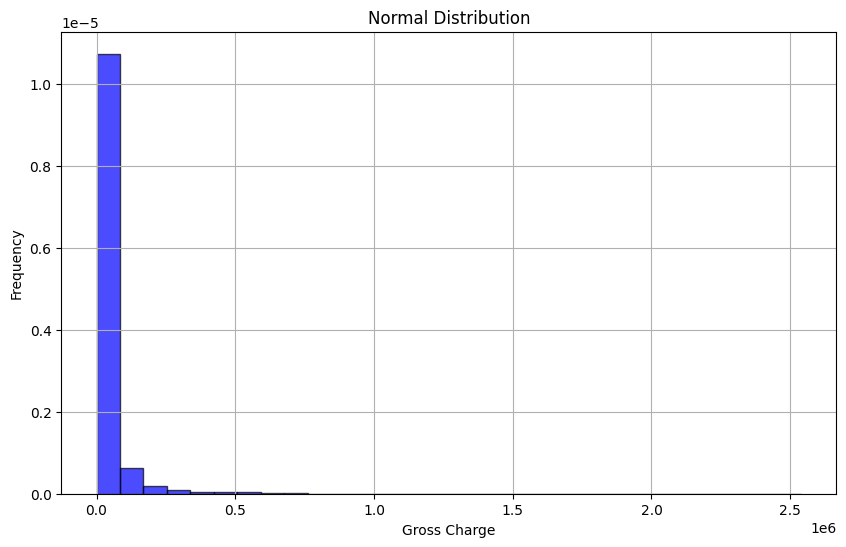

In [45]:
# Histogram for Gross Charges
plt.figure(figsize=(10, 6))
plt.hist(df_nyp['gross_charges'], bins=30, density=True, alpha=0.7, color='blue',edgecolor='black')
plt.title('Normal Distribution')
plt.xlabel('Gross Charge')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

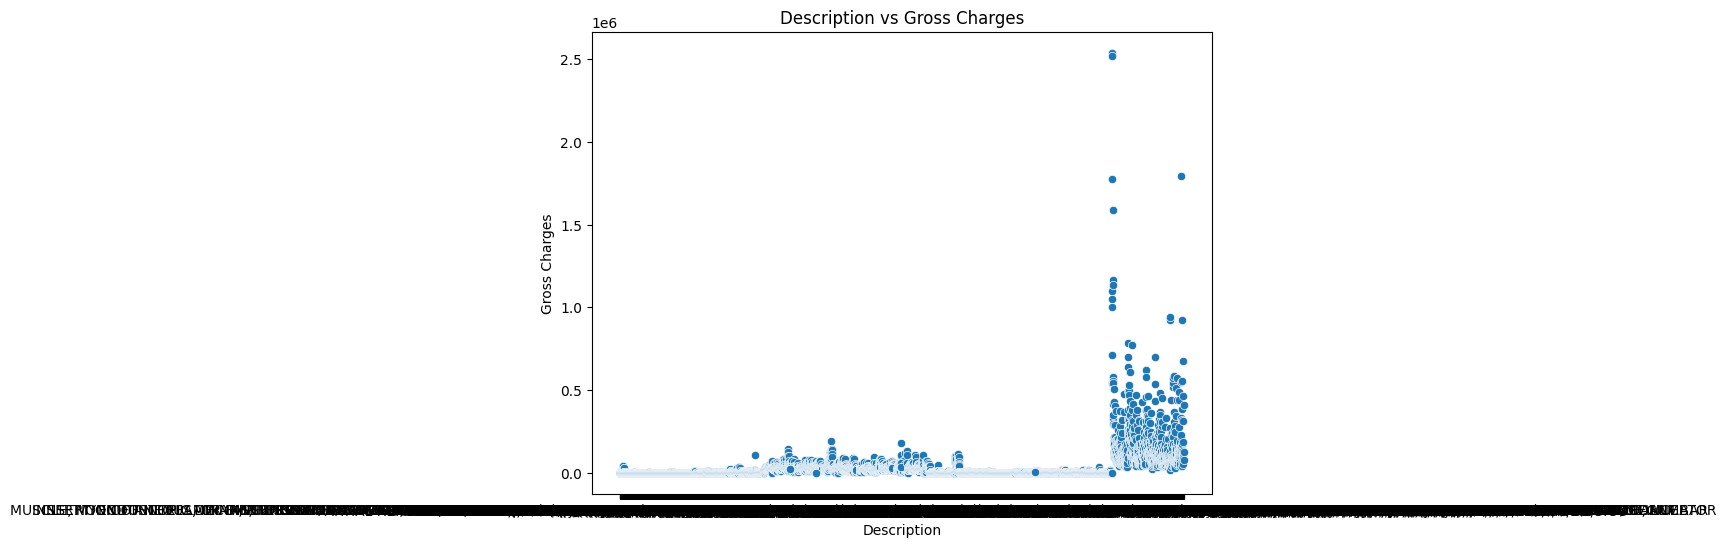

In [ ]:
# Scatter Plot displaying Description of CPT Code vs Gross Charge
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_nyp, x='description', y='gross_charges')
plt.title('Description vs Gross Charges')
plt.xlabel('Description')
plt.ylabel('Gross Charges')
plt.show()

In [ ]:
# Calculating Mean of numerical values in NYP dataset
mean_values_nyp = dfnyp[['Gross Charges', 'Discounted Cash Price', 'Aetna', 'Cigna', 'Empire Blue Cross Blue Shield', 'Emblem Health', 'Consumer Health Network', 'Devon', 'Equian', 'First Health', 'Magnacare', 'Multiplan/Beechstreet/PHCS', 'QHM', 'Worldwide', 'Minimum Negotiated Charge', 'Maximum Negotiated Charge']].mean()

print("Mean:")
print(mean_values_nyp)

Mean:
Gross Charges                33859.881200
Discounted Cash Price        33859.881200
Minimum Negotiated Charge     2249.918880
Maximum Negotiated Charge    23902.774243
dtype: float64


<ipython-input-20-a061f3d75b99>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values_nyp = dfnyp[['Gross Charges', 'Discounted Cash Price', 'Aetna', 'Cigna', 'Empire Blue Cross Blue Shield', 'Emblem Health', 'Consumer Health Network', 'Devon', 'Equian', 'First Health', 'Magnacare', 'Multiplan/Beechstreet/PHCS', 'QHM', 'Worldwide', 'Minimum Negotiated Charge', 'Maximum Negotiated Charge']].mean()


In [ ]:
# Calculating Median of numerical values in NYP dataset
median_values_nyp = dfnyp[['Gross Charges', 'Discounted Cash Price','Aetna', 'Cigna', 'Empire Blue Cross Blue Shield', 'Emblem Health', 'Consumer Health Network', 'Devon', 'Equian', 'First Health', 'Magnacare', 'Multiplan/Beechstreet/PHCS', 'QHM', 'Worldwide', 'Minimum Negotiated Charge', 'Maximum Negotiated Charge']].median()

print("Median:")
print(median_values_nyp)


Median:
Gross Charges                3925.000000
Discounted Cash Price        3925.000000
Minimum Negotiated Charge     431.142905
Maximum Negotiated Charge    4086.731300
dtype: float64


<ipython-input-21-db1399548ead>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values_nyp = dfnyp[['Gross Charges', 'Discounted Cash Price','Aetna', 'Cigna', 'Empire Blue Cross Blue Shield', 'Emblem Health', 'Consumer Health Network', 'Devon', 'Equian', 'First Health', 'Magnacare', 'Multiplan/Beechstreet/PHCS', 'QHM', 'Worldwide', 'Minimum Negotiated Charge', 'Maximum Negotiated Charge']].median()


In [ ]:
# Calculating Mode of numerical values in NYP dataset
mode_values_nyp = dfnyp[['Gross Charges', 'Discounted Cash Price', 'Aetna', 'Cigna', 'Empire Blue Cross Blue Shield', 'Emblem Health', 'Consumer Health Network', 'Devon', 'Equian', 'First Health', 'Magnacare', 'Multiplan/Beechstreet/PHCS', 'QHM', 'Worldwide', 'Minimum Negotiated Charge', 'Maximum Negotiated Charge']].mode()

print("Mode:")
print(mode_values_nyp)


Mode:
   Gross Charges  Discounted Cash Price Aetna Cigna  \
0          122.0                  122.0  9144  7496   

  Empire Blue Cross Blue Shield Emblem Health      Consumer Health Network  \
0                         11924        9474.4  Included in Service Package   

                         Devon                       Equian  \
0  Included in Service Package  Included in Service Package   

                  First Health                    Magnacare  \
0  Included in Service Package  Included in Service Package   

    Multiplan/Beechstreet/PHCS                          QHM  \
0  Included in Service Package  Included in Service Package   

                     Worldwide  Minimum Negotiated Charge  \
0  Included in Service Package                     2412.0   

   Maximum Negotiated Charge  
0                    11924.0  


In [ ]:
# Descriptive statistics for Stony Brook University Hospital

In [ ]:
df_stonybrook.describe()

,gross_charge,discounted_cash_price,de_identified_min_contracted_rate,de_identified_max_contracted_rate,derived_contracted_rate,1199_commercial_other,aetna_medicare_advantage_hmo,aetna_commercial_hmo_pos,aetna_commercial_ppo_open_access,aetna_commercial_other,...,optum_commercial_other,oxford_commercial_other,oxford_commercial_hmo_pos,tricare_commercial_other,united_healthcare_commercial_other,united_healthcare_medicare_advantage_hmo,united_healthcare_commercial_hmo_pos,united_healthcare_medicaid_hmo,united_healthcare_commercial_ppo_open_access,veteran_family_commercial_other
count,7.710000e+03,7.710000e+03,6254.000000,6.254000e+03,6254.000000,1014.000000,1106.000000,1827.000000,1612.000000,128.000000,...,943.000000,1777.000000,0.0,434.000000,2357.000000,624.000000,133.000000,2065.000000,357.000000,46.000000
mean,2.274832e+04,2.274832e+04,4090.693876,1.003579e+04,6315.587725,5791.542456,5614.005027,4320.418248,4436.188381,1703.756250,...,10868.205705,2572.653849,NaN,2070.212120,5977.464298,4438.776234,3261.594586,2454.314228,789.416667,702.261087
std,7.470570e+04,7.470570e+04,10576.213503,2.915075e+04,14601.846406,24302.352403,12671.487487,8718.537182,8881.733882,5124.232802,...,20703.429246,4036.667401,NaN,8501.228677,16227.981498,9982.579323,10266.478193,11009.140577,2880.486830,1717.006016
min,3.000000e-02,3.000000e-02,0.010000,1.000000e-01,0.030000,0.010000,1.100000,0.020000,0.500000,0.590000,...,2.370000,0.010000,NaN,1.000000,0.010000,1.330000,0.190000,0.010000,0.180000,2.480000
25%,1.065895e+03,1.065895e+03,96.520000,6.982500e+02,403.117500,148.797500,125.070000,277.900000,312.750000,110.387500,...,200.450000,197.880000,NaN,71.220000,258.500000,96.290000,129.000000,42.980000,8.400000,26.810000
50%,4.745295e+03,4.745295e+03,1108.860000,4.311000e+03,2600.740000,974.400000,714.860000,2153.000000,2153.000000,404.500000,...,1700.200000,1932.380000,NaN,236.230000,1571.000000,387.500000,444.000000,425.790000,34.830000,82.710000
75%,1.103881e+04,1.103881e+04,4309.532500,8.170000e+03,5870.540000,4592.000000,5782.430000,4822.000000,4822.000000,1778.920000,...,13359.895000,4704.000000,NaN,1486.947500,5127.000000,3531.920000,2257.430000,1753.100000,286.800000,235.000000
max,1.857952e+06,1.857952e+06,327869.690000,1.302636e+06,370099.900000,331304.280000,157848.600000,99999.990000,96372.570000,54838.130000,...,277267.380000,80891.260000,NaN,154940.610000,291490.750000,92493.910000,88051.340000,327869.690000,26350.000000,7195.400000


In [ ]:
# Frequency counts for each unique description
df_stonybrook['description'].value_counts()

R&B MED 05CA SEMI-PRIVATE/2                                                                   3
R&B SHA 05PS/11PS SEMI-PRIVATE                                                                3
DESTRUCTION OF FIRST DIVISION OF FACE NERVE BRANCH                                            2
INJECTION OF CHEMICAL FOR PARALYSIS OF SALIVARY GLANDS ON BOTH SIDES OF MOUTH                 2
INJECTION OF CHEMICAL FOR PARALYSIS OF FACIAL AND NECK NERVE MUSCLES ON BOTH SIDES OF FACE    2
                                                                                             ..
ANCHOR/SCREW FOR OPPOSING BONE-TO-BONE OR SOFT TISSUE-TO-BONE (IMPLANTABLE)                   1
BRACHYTHERAPY NEEDLE                                                                          1
CARDIOVERTER-DEFIBRILLATOR, DUAL CHAMBER (IMPLANTABLE)                                        1
CARDIOVERTER-DEFIBRILLATOR, SINGLE CHAMBER (IMPLANTABLE)                                      1
SEMI-PRIVATE                            

In [46]:
df_stonybrook.columns

Index(['code', 'description', 'type', 'package_line_level', 'gross_charge',
       'discounted_cash_price', 'de_identified_min_contracted_rate',
       'de_identified_max_contracted_rate', 'derived_contracted_rate',
       '1199_commercial_other', 'aetna_medicare_advantage_hmo',
       'aetna_commercial_hmo_pos', 'aetna_commercial_ppo_open_access',
       'aetna_commercial_other', 'empire_health_commercial_other',
       'empire_health_commercial_ppo_open_access',
       'bluecross_blueshield_commercial_other',
       'beacon_health_commercial_other', 'carelon_health_commercial_other',
       'cigna_commercial_ppo_open_access', 'cigna_commercial_other',
       'cigna_commercial_hmo_pos', 'eh_facet_commercial_other',
       'emblemhealth_commercial_ppo_open_access',
       'emblemhealth_commercial_other', 'emblemhealth_commercial_hmo_pos',
       'emblemhealth_medicaid_hmo', 'emblemhealth_medicare_advantage_hmo',
       'empire_health_commercial_hmo_pos',
       'empire_health_medicare_

In [47]:
df_stonybrook['discounted_cash_price'].value_counts()

8165.00     268
12090.00     70
13590.00     63
8965.00      47
513.00       13
           ... 
6453.95       1
3727.11       1
2284.63       1
18455.69      1
4580.00       1
Name: discounted_cash_price, Length: 5871, dtype: int64

In [48]:
df_stonybrook['gross_charge'].value_counts()

8165.00     268
12090.00     70
13590.00     63
8965.00      47
513.00       13
           ... 
6453.95       1
3727.11       1
2284.63       1
18455.69      1
4580.00       1
Name: gross_charge, Length: 5871, dtype: int64

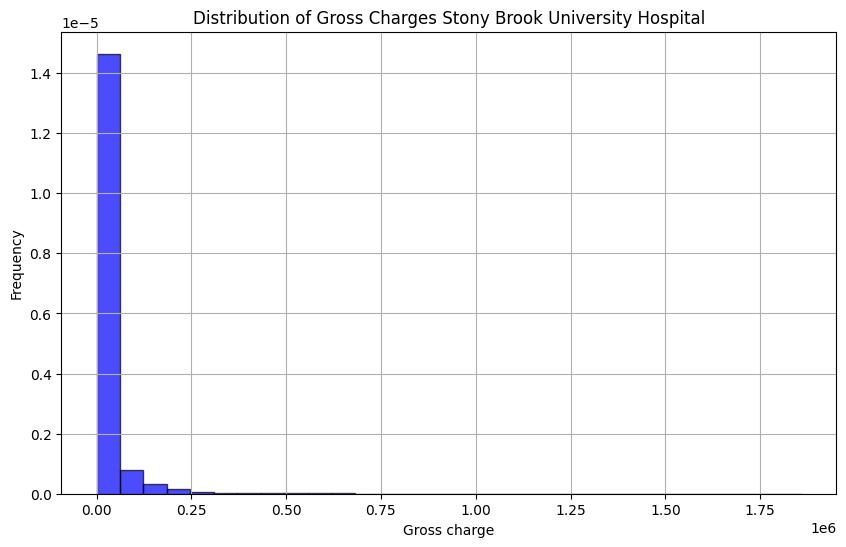

In [49]:
# Histogram for Gross Charges (Stony Brook)
plt.figure(figsize=(10, 6))
plt.hist(df_stonybrook['gross_charge'], bins=30, density=True, alpha=0.7, color='blue',edgecolor='black')
plt.title('Distribution of Gross Charges Stony Brook University Hospital')
plt.xlabel('Gross charge')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Comparing the mean values of the gross charges of New York Presbyterian Hospital and Stony Brook University Hospital, it appears that NYP is more expensive.

## 2. SQLite Database Operations

In [ ]:
# Loading Packages
from sqlalchemy import create_engine
import sqlite3

In [ ]:
# Creating a temporary + local database (health.db) using SQLITE
conn = sqlite3.connect('health.db')
c = conn.cursor()

In [ ]:
#  Manual table creation

c.execute('''
            CREATE TABLE health_data (
              patient_name TEXT,
              diagnosis TEXT,
              age INTEGER,
              weight_lbs REAL,
              height_in REAL,
              insurance TEXT,
              gender TEXT
            );
        ''')
conn.commit()

In [50]:
# Confirm that the new table health_data has been created within the database health.db

c.execute('''
  SELECT name
  FROM sqlite_master
  WHERE type='table';
  ''')

c.fetchall()

[('health_data',)]

In [ ]:
c.execute('''
  SELECT * FROM health_data;
''')

print(c.fetchall())

[]


In [51]:
# Use INSERT INTO to populate the health_data table with fake data. I used these categories: patient_name, diagnosis, age, weight_lbs, height_in, insurance, and gender

In [ ]:
sql_query = '''
INSERT INTO health_data
(
  'patient_name',
  'diagnosis',
  'age',
  'weight_lbs',
  'height_in',
  'insurance',
  'gender'
)
values
('Sarah', 'diabetes', 45, 150.2, 67, 'medicare', 'F'),
('Mark', 'hypertension', 39, 190.8, 74, 'emblem', 'M'),
('Eliza', 'insomnia', 31, 163, 68, 'medicaid', 'F');
'''

In [ ]:
# Execute the query
c.execute(sql_query)
conn.commit()

In [ ]:
sql_query2 = '''
SELECT *
FROM health_data;
'''
c.execute(sql_query2)
print(c.fetchall())

[('Sarah', 'diabetes', 45, 150.2, 67.0, 'medicare', 'F'), ('Mark', 'hypertension', 39, 190.8, 74.0, 'emblem', 'M'), ('Eliza', 'insomnia', 31, 163.0, 68.0, 'medicaid', 'F')]


In [ ]:
pd.read_sql_query("select * from health_data;", conn)

,patient_name,diagnosis,age,weight_lbs,height_in,insurance,gender
0,Sarah,diabetes,45,150.2,67.0,medicare,F
1,Mark,hypertension,39,190.8,74.0,emblem,M
2,Eliza,insomnia,31,163.0,68.0,medicaid,F


Automatic Table Creation

In [37]:
df_stonybrook.to_sql('health_data', conn, if_exists='replace')


7710

In [39]:
query = """
  select *
  from health_data
  where type = 'Inpatient'
  limit 100;
"""

response = pd.read_sql(query, conn)
response

# this creates a new dataframe called response

,index,code,description,type,package_line_level,gross_charge,discounted_cash_price,de_identified_min_contracted_rate,de_identified_max_contracted_rate,derived_contracted_rate,...,optum_commercial_other,oxford_commercial_other,oxford_commercial_hmo_pos,tricare_commercial_other,united_healthcare_commercial_other,united_healthcare_medicare_advantage_hmo,united_healthcare_commercial_hmo_pos,united_healthcare_medicaid_hmo,united_healthcare_commercial_ppo_open_access,veteran_family_commercial_other
0,6041,3,"ECMO OR TRACH WITH MV >96 HRS OR PDX EXC FACE,...",Inpatient,Line,1017151.10,1017151.10,71743.55,1302635.53,370099.90,...,NaN,None,None,NaN,172806.59,NaN,None,NaN,None,None
1,6042,003X,Bone Marrow Transplant,Inpatient,Line,557046.21,557046.21,35620.00,92452.99,53264.34,...,NaN,None,None,NaN,NaN,NaN,None,NaN,None,None
2,6043,4,"TRACH WITH MV >96 HRS OR PDX EXC FACE, MOUTH &...",Inpatient,Line,782516.58,782516.58,81244.84,244532.32,168379.62,...,179361.71,None,None,NaN,NaN,NaN,None,NaN,None,None
3,6044,004X,Tracheostomy W Mv 96+ Hours W Extensive Procedure,Inpatient,Line,1196630.91,1196630.91,47295.87,129363.82,93275.62,...,NaN,None,None,NaN,NaN,NaN,None,NaN,None,None
4,6045,005X,Tracheostomy W Mv 96+ Hours W/O Extensive Proc...,Inpatient,Line,522914.36,522914.36,39590.82,190280.65,114935.74,...,NaN,None,None,NaN,NaN,NaN,None,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6136,94,BACTERIAL & TUBERCULOUS INFECTIONS OF NERVOUS ...,Inpatient,Line,100327.71,100327.71,NaN,NaN,NaN,...,NaN,None,None,NaN,NaN,NaN,None,NaN,None,None
96,6137,095X,Cleft Lip & Palate Repair,Inpatient,Line,73699.70,73699.70,7754.75,55470.00,31612.38,...,NaN,None,None,NaN,NaN,NaN,None,7754.75,None,None
97,6138,96,BACTERIAL & TUBERCULOUS INFECTIONS OF NERVOUS ...,Inpatient,Line,182205.45,182205.45,123220.63,123220.63,123220.63,...,NaN,None,None,NaN,NaN,NaN,None,NaN,None,None
98,6139,97,NON-BACTERIAL INFECT OF NERVOUS SYS EXC VIRAL ...,Inpatient,Line,548688.11,548688.11,33684.35,33684.35,33684.35,...,NaN,None,None,NaN,NaN,NaN,None,NaN,None,None
